# Bike Rental

This data set is from https://www.lyft.com/bikes/bay-wheels/system-data.
This data set is about Bike rental sharing from January to December of 2018. 

Each trip is anonymized and includes:  
Trip Duration (seconds)  
Start Time and Date  
End Time and Date  
Start Station ID  
Start Station Name  
Start Station Latitude  
Start Station Longitude  
End Station ID  
End Station Name  
End Station Latitude  
End Station Longitude  
Bike ID  
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)  
Member Year of Birth  
Member Gender  

Trip Duration is the most important feature related to rental fees. I'll explore the other features related to the Trip Duration.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
# load all of 2018 trip data
bike_rental_mon1 = pd.read_csv('./201801-fordgobike-tripdata.csv')
bike_rental_mon2 = pd.read_csv('./201802-fordgobike-tripdata.csv')
bike_rental_mon3 = pd.read_csv('./201803-fordgobike-tripdata.csv')
bike_rental_mon4 = pd.read_csv('./201804-fordgobike-tripdata.csv')
bike_rental_mon5 = pd.read_csv('./201805-fordgobike-tripdata.csv')
bike_rental_mon6 = pd.read_csv('./201806-fordgobike-tripdata.csv')
bike_rental_mon7 = pd.read_csv('./201807-fordgobike-tripdata.csv')
bike_rental_mon8 = pd.read_csv('./201808-fordgobike-tripdata.csv')
bike_rental_mon9 = pd.read_csv('./201809-fordgobike-tripdata.csv')
bike_rental_mon10 = pd.read_csv('./201810-fordgobike-tripdata.csv')
bike_rental_mon11 = pd.read_csv('./201811-fordgobike-tripdata.csv')
bike_rental_mon12 = pd.read_csv('./201812-fordgobike-tripdata.csv')

In [3]:
bike_rental_mon12.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,68529,2018-12-31 20:03:11.7350,2019-01-01 15:05:21.5580,217.0,27th St at MLK Jr Way,37.817015,-122.271761,217.0,27th St at MLK Jr Way,37.817015,-122.271761,3305,Customer,NaN,NaN,No
1,63587,2018-12-31 19:00:32.1210,2019-01-01 12:40:19.3660,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4281,Customer,1995.0,Male,No
2,64169,2018-12-31 15:09:01.0820,2019-01-01 08:58:30.0910,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4267,Customer,1988.0,Male,No
3,30550,2018-12-31 19:26:20.7750,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,37.794231,-122.402923,19.0,Post St at Kearny St,37.788975,-122.403452,5422,Subscriber,1986.0,Male,Yes
4,2150,2018-12-31 23:59:12.0970,2019-01-01 00:35:02.1530,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,4820,Customer,NaN,NaN,No


This data frame has 16 features.
Bike rental duration is related to the rental fee so that I'll figure out the relationship between duration_sec and other features.

# Preliminary Wrangling

#### Concatenate 12 dataframes into 1 dataframe

In [4]:
bike_rental = pd.concat([bike_rental_mon1, bike_rental_mon2, bike_rental_mon3, bike_rental_mon4, bike_rental_mon5, bike_rental_mon6,
                         bike_rental_mon7, bike_rental_mon8, bike_rental_mon9, bike_rental_mon10, bike_rental_mon11, bike_rental_mon12])

In [5]:
bike_rental.reset_index(drop=True, inplace=True)
bike_rental.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [6]:
print(bike_rental.shape)
print(bike_rental.dtypes)

(1863721, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


### check if there are duplicated rows

In [7]:
bike_rental[bike_rental.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


There is no duplicated row in the data frame

### drop null values

In [8]:
# drop null values
bike_rental.dropna(inplace=True)

In [9]:
bike_rental.reset_index(drop=True, inplace=True)
bike_rental

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
2,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
3,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
4,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
5,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
6,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes
7,432,2018-01-31 23:34:26.4840,2018-01-31 23:41:39.2970,89.0,Division St at Potrero Ave,37.769218,-122.407646,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2928,Subscriber,1993.0,Male,No
8,601,2018-01-31 23:29:46.8320,2018-01-31 23:39:48.0000,223.0,16th St Mission BART Station 2,37.764765,-122.420091,86.0,Market St at Dolores St,37.769305,-122.426826,3016,Subscriber,1957.0,Male,No
9,887,2018-01-31 23:24:16.3570,2018-01-31 23:39:04.1230,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,55,Subscriber,1976.0,Female,Yes


### change data type

I'll change the date type properly to analyze well

start_time: object -> datatime  
end_time: object -> datatime  
start_station_id: float -> int  
end_station_id: float -> int  
user_type: object -> CategoricalDtype  
member_birth_year: float -> int  
member_gender: object -> CategoricalDtype  
bike_share_for_all_trip: object -> CategoricalDtype

In [10]:
numeric_column_dtype = {'start_time': 'datetime64',
                        'end_time': 'datetime64',
                        'start_station_id': 'int64',
                        'end_station_id': 'int64',
                        'member_birth_year': 'int64'}

catergorical_column_dtype = {'user_type': ['Subscriber', 'Customer'],
                             'member_gender': ['Male', 'Female'],
                             'bike_share_for_all_trip': ['Yes', 'No']}

def change_into_dtype(dataframe, column, dtype):
    '''change the column type of dataframe into dtype'''
    dataframe[column] = dataframe[column].astype(dtype)

def iterate_dict_and_change_numeric_dtype(dataframe):
    '''change numeric columns type of dataframe into dtype'''
    for column in numeric_column_dtype:
        change_into_dtype(dataframe, column, numeric_column_dtype[column])
        
def iterate_dict_and_change_categorical_dtype(dataframe):
    '''change categorical columns type of dataframe into dtype'''
    for column in catergorical_column_dtype:
        target_dtype = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = catergorical_column_dtype[column])
        dataframe[column] = dataframe[column].astype(target_dtype)

In [11]:
iterate_dict_and_change_numeric_dtype(bike_rental)
iterate_dict_and_change_categorical_dtype(bike_rental)

In [12]:
bike_rental.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip          category
dtype: object

### What is the structure of your dataset?

This data set has 1,741,556 rows × 16 columns

### What is/are the main feature(s) of interest in your dataset?

The main focus is on the duration seconds because it is highly related with rental fees.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I think start hour, month, user type, gender, birth year is the related features

# Visualization

## Univariate plots

#### duration_sec histogram
duration_sec is the most important feature because it is highly related to the rental fee. I'll start by looking at the distribution of the main variable of duration sec

In [13]:
# create duration_sec bins
duration_bins = np.arange(50, bike_rental.duration_sec.max(), 200)
duration_bins

array([   50,   250,   450,   650,   850,  1050,  1250,  1450,  1650,
        1850,  2050,  2250,  2450,  2650,  2850,  3050,  3250,  3450,
        3650,  3850,  4050,  4250,  4450,  4650,  4850,  5050,  5250,
        5450,  5650,  5850,  6050,  6250,  6450,  6650,  6850,  7050,
        7250,  7450,  7650,  7850,  8050,  8250,  8450,  8650,  8850,
        9050,  9250,  9450,  9650,  9850, 10050, 10250, 10450, 10650,
       10850, 11050, 11250, 11450, 11650, 11850, 12050, 12250, 12450,
       12650, 12850, 13050, 13250, 13450, 13650, 13850, 14050, 14250,
       14450, 14650, 14850, 15050, 15250, 15450, 15650, 15850, 16050,
       16250, 16450, 16650, 16850, 17050, 17250, 17450, 17650, 17850,
       18050, 18250, 18450, 18650, 18850, 19050, 19250, 19450, 19650,
       19850, 20050, 20250, 20450, 20650, 20850, 21050, 21250, 21450,
       21650, 21850, 22050, 22250, 22450, 22650, 22850, 23050, 23250,
       23450, 23650, 23850, 24050, 24250, 24450, 24650, 24850, 25050,
       25250, 25450,

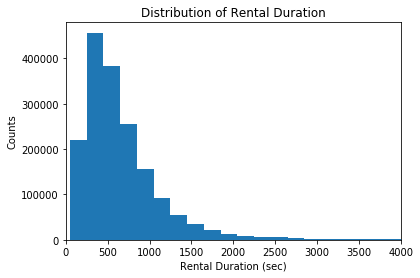

In [14]:
# plot histogram of duration_sec
base_color = sns.color_palette()[0]
plt.hist(data=bike_rental, x='duration_sec', color=base_color, bins=duration_bins)
plt.xlim(0, 4000)
plt.title('Distribution of Rental Duration')
plt.xlabel('Rental Duration (sec)')
plt.ylabel('Counts');

There are many people who ride bikes about 500 seconds. This graph is highly right skewed so that I'll apply log transform 

#### log transformation of duration_sec histogram

In [15]:
np.log10(bike_rental.duration_sec.describe())

count    6.240937
mean     2.888102
std      3.288484
min      1.785330
25%      2.536558
50%      2.734800
75%      2.923762
max      4.935915
Name: duration_sec, dtype: float64

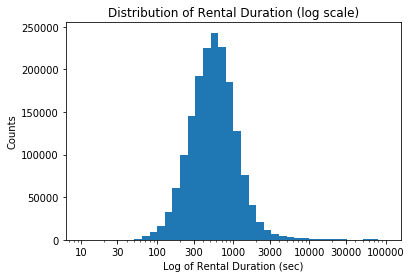

In [16]:
# plot histogram of duration_sec log transformation
log_duration_bins = 10 ** np.arange(1, 5.0+0.1, 0.1)
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data=bike_rental, x='duration_sec', bins=log_duration_bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Distribution of Rental Duration (log scale)')
plt.xlabel('Log of Rental Duration (sec)')
plt.ylabel('Counts');

It's a normal distribution

#### countplot of member_gender

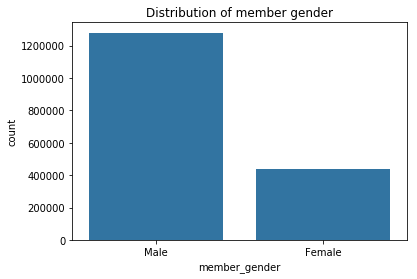

In [17]:
sns.countplot(data=bike_rental, x='member_gender', color=base_color);
plt.title('Distribution of member gender');

Male are three times more than female

#### countplot of user_type

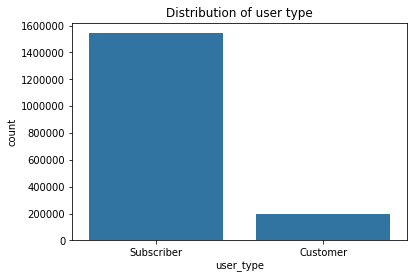

In [18]:
sns.countplot(data=bike_rental, x='user_type', color=base_color)
plt.title('Distribution of user type');

Subscribers are about seven times more than customers

#### histogram of member_birth_year

In [19]:
bike_rental_cut_duration_outliers = bike_rental.query('duration_sec < 2500')
bike_rental_cut_duration_outliers.reset_index(drop=True, inplace=True)
bike_rental_cut_duration_outliers

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No
1,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,Male,No
2,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987,Male,Yes
3,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994,Female,Yes
4,432,2018-01-31 23:34:26.484,2018-01-31 23:41:39.297,89,Division St at Potrero Ave,37.769218,-122.407646,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2928,Subscriber,1993,Male,No
5,601,2018-01-31 23:29:46.832,2018-01-31 23:39:48.000,223,16th St Mission BART Station 2,37.764765,-122.420091,86,Market St at Dolores St,37.769305,-122.426826,3016,Subscriber,1957,Male,No
6,887,2018-01-31 23:24:16.357,2018-01-31 23:39:04.123,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,55,Subscriber,1976,Female,Yes
7,210,2018-01-31 23:33:03.046,2018-01-31 23:36:33.704,7,Frank H Ogawa Plaza,37.804562,-122.271738,186,Lakeside Dr at 14th St,37.801319,-122.262642,2602,Subscriber,1976,Male,No
8,188,2018-01-31 23:30:58.136,2018-01-31 23:34:06.391,98,Valencia St at 16th St,37.765052,-122.421866,76,McCoppin St at Valencia St,37.771662,-122.422423,2556,Subscriber,1964,Female,No
9,808,2018-01-31 23:19:58.603,2018-01-31 23:33:27.531,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,98,Valencia St at 16th St,37.765052,-122.421866,3041,Subscriber,1976,Male,Yes


In [20]:
birth_bins = np.arange(bike_rental_cut_duration_outliers.member_birth_year.min(), bike_rental_cut_duration_outliers.member_birth_year.max(), 5)
birth_bins

array([1881, 1886, 1891, 1896, 1901, 1906, 1911, 1916, 1921, 1926, 1931,
       1936, 1941, 1946, 1951, 1956, 1961, 1966, 1971, 1976, 1981, 1986,
       1991, 1996], dtype=int64)

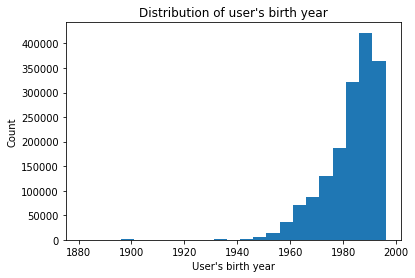

In [21]:
plt.hist(data=bike_rental_cut_duration_outliers, x='member_birth_year', bins=birth_bins);
plt.title('Distribution of user\'s birth year')
plt.xlabel('User\'s birth year')
plt.ylabel('Count');

This histogram is highly left-skewed which means young people usually use rental bikes.

#### histogram of start time (hours)

In [22]:
# extract start hour from start_time
bike_rental_cut_duration_outliers['start_hour'] = bike_rental_cut_duration_outliers.start_time.apply(lambda x: x.time().hour)
bike_rental_cut_duration_outliers.head()

C:\Users\weroo\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour
0,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No,23
1,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,Male,No,23
2,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987,Male,Yes,23
3,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994,Female,Yes,23
4,432,2018-01-31 23:34:26.484,2018-01-31 23:41:39.297,89,Division St at Potrero Ave,37.769218,-122.407646,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2928,Subscriber,1993,Male,No,23


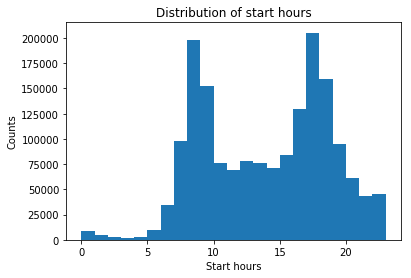

In [23]:
hour_bins = np.arange(0, 23+1, 1)
plt.hist(data=bike_rental_cut_duration_outliers, x='start_hour', color=base_color, bins=hour_bins)
plt.title('Distribution of start hours')
plt.xlabel('Start hours')
plt.ylabel('Counts');

Lots of people ride bikes from 8:00 to 9:00 and from 17:00 to 18:00 (morning and evening)

#### histogram of end time (hours)

In [24]:
# extract end hour from end_time
bike_rental_cut_duration_outliers['end_hour'] = bike_rental_cut_duration_outliers.end_time.apply(lambda x: x.time().hour)
bike_rental_cut_duration_outliers.head()

C:\Users\weroo\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour
0,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No,23,0
1,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,Male,No,23,23
2,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987,Male,Yes,23,23
3,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994,Female,Yes,23,23
4,432,2018-01-31 23:34:26.484,2018-01-31 23:41:39.297,89,Division St at Potrero Ave,37.769218,-122.407646,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2928,Subscriber,1993,Male,No,23,23


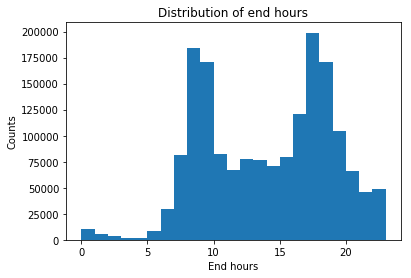

In [25]:
plt.hist(data=bike_rental_cut_duration_outliers, x='end_hour', color=base_color, bins=hour_bins)
plt.title('Distribution of end hours')
plt.xlabel('End hours')
plt.ylabel('Counts');

This graph shows lots of people also ride bikes from 8:00 to 9:00 and from 17:00 to 18:00 (morning and evening)

#### historam of month

In [26]:
bike_rental_cut_duration_outliers['month'] = bike_rental_cut_duration_outliers.start_time.apply(lambda x: x.date().month)
bike_rental_cut_duration_outliers.head()

C:\Users\weroo\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour,month
0,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No,23,0,1
1,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,Male,No,23,23,1
2,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987,Male,Yes,23,23,1
3,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994,Female,Yes,23,23,1
4,432,2018-01-31 23:34:26.484,2018-01-31 23:41:39.297,89,Division St at Potrero Ave,37.769218,-122.407646,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2928,Subscriber,1993,Male,No,23,23,1


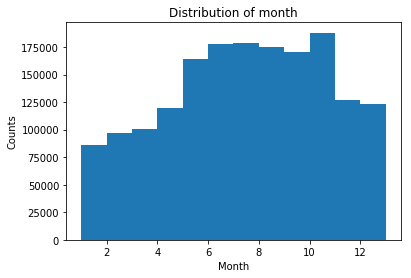

In [27]:
month_bins = np.arange(1, 13+1, 1)
plt.hist(data=bike_rental_cut_duration_outliers, x='month', color=base_color, bins=month_bins)
plt.title('Distribution of month')
plt.xlabel('Month')
plt.ylabel('Counts');

There are more rental user from May to October than from November to April

#### countplot of bike share for all trip

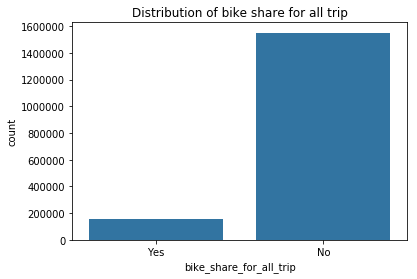

In [28]:
sns.countplot(data=bike_rental_cut_duration_outliers, x='bike_share_for_all_trip', color=base_color)
plt.title('Distribution of bike share for all trip');

## Bivariate plots

To start off with, I want to look at the pairwise correlations present between features in the data



In [29]:
numeric_vars = ['duration_sec', 'start_hour', 'end_hour', 'member_birth_year', 'month'] 
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

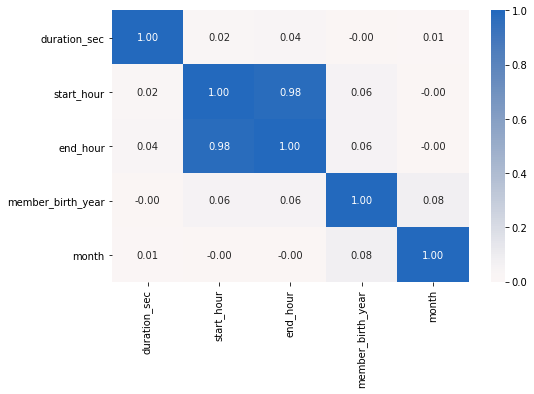

In [30]:
# correlation heatmap plot between numeric variables
plt.figure(figsize = [8, 5]) 
sns.heatmap(bike_rental_cut_duration_outliers[numeric_vars].corr(), annot = True, fmt = '.2f',
            cmap = 'vlag_r', center = 0)
plt.show()

The start_hour and end_hour are highly related factors as we can think, but the other numeric variables have no correlations each other. In order to see the visual relationship, let's draw scatter plot

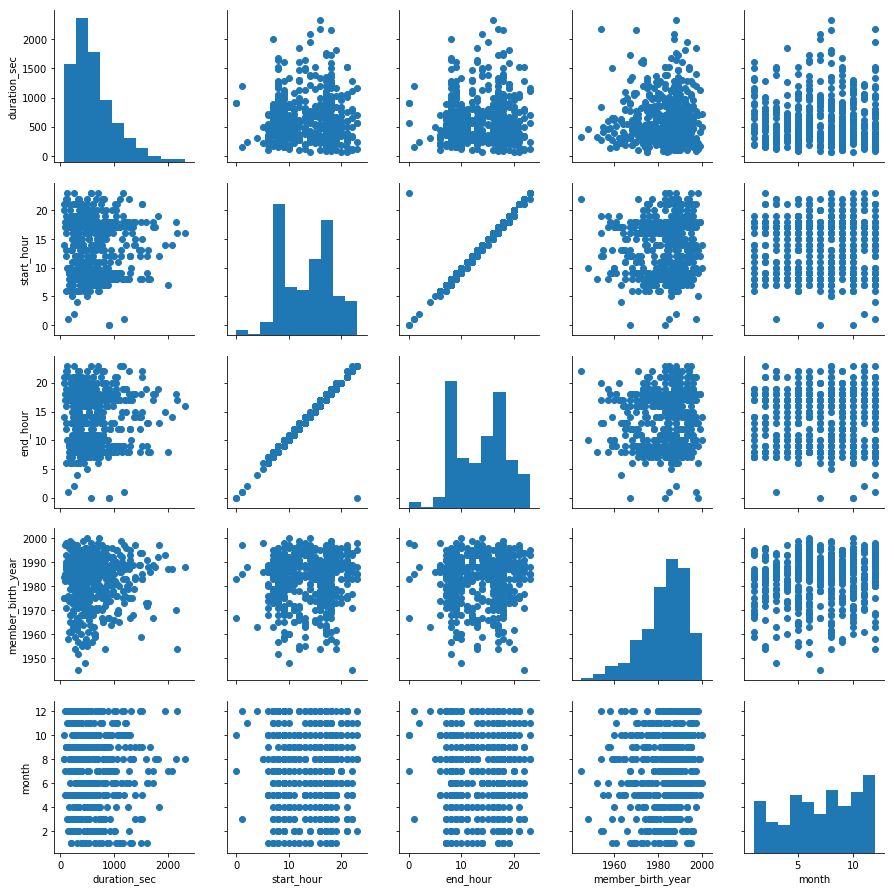

In [31]:
# correlation scatter plot between numeric variables
samples = np.random.choice(bike_rental_cut_duration_outliers.shape[0], 500, replace=False)
bike_samples = bike_rental_cut_duration_outliers.loc[samples, :]

g = sns.PairGrid(data=bike_samples, vars=numeric_vars)
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

As you saw already, the start_hour and end_hour are highly related factors.

Let's move on to looking at how duration sec correlate with the categorical variables.

<Figure size 720x720 with 0 Axes>

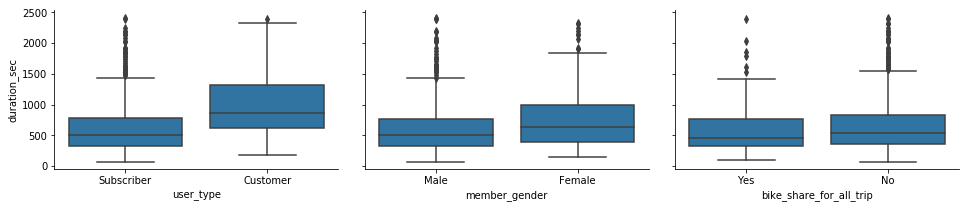

In [32]:
# plot matrix of numeric features against categorical features
samples = np.random.choice(bike_rental_cut_duration_outliers.shape[0], 1000, replace=False)
bike_samples = bike_rental_cut_duration_outliers.loc[samples, :]

def boxgrid(x, y, **kwargs):
    defualt_color = sns.color_palette()[0]
    sns.boxplot(x, y, color=defualt_color)

plt.figure(figsize=[10, 10])
g = sns.PairGrid(data=bike_samples, y_vars='duration_sec', x_vars=categoric_vars, height=3, aspect=1.5)
g.map(boxgrid);

It shows that Custmoers more likely to ride bikes longer than Subscribers. Duration seconds of Female slightly longer than Male. This aspect is same as bike share for all trip

Let's look at more detail of each relationship

#### violin plot (duration_sec against member_gender)

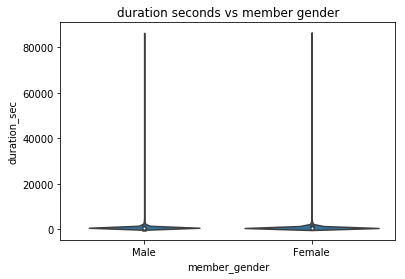

In [33]:
sns.violinplot(data=bike_rental, x='member_gender', y='duration_sec', color=base_color)
plt.title('duration seconds vs member gender');

There are so many outliers over the upper limits so that I cut the outliers

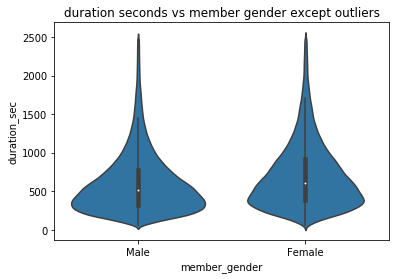

In [34]:
sns.violinplot(data=bike_rental_cut_duration_outliers, x='member_gender', y='duration_sec', color=base_color)
plt.title('duration seconds vs member gender except outliers');

Female ride bikes longer than male

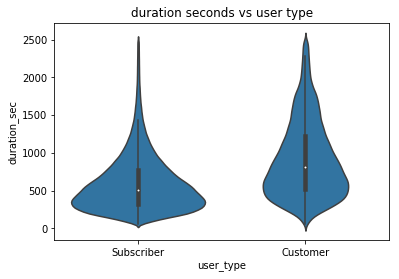

In [35]:
sns.violinplot(data=bike_rental_cut_duration_outliers, x='user_type', y='duration_sec', color=base_color)
plt.title('duration seconds vs user type');

Customers ride bikes longer than subscribers

Let's look at relationships between the three categorical features.

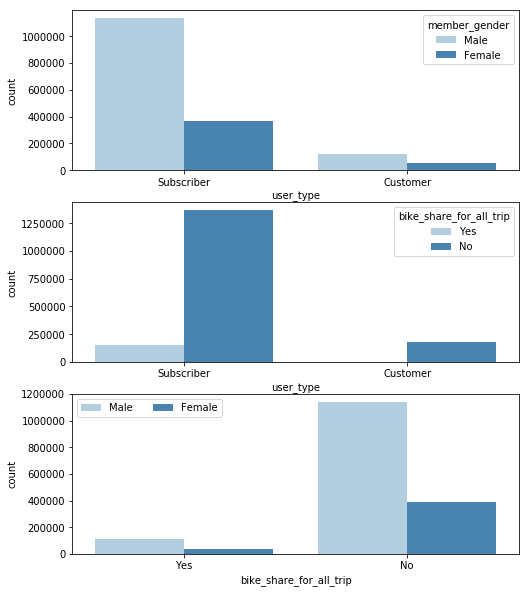

In [36]:
plt.figure(figsize = [8, 10])

plt.subplot(3, 1, 1)
sns.countplot(data=bike_rental_cut_duration_outliers, x='user_type', hue='member_gender', palette='Blues')

ax = plt.subplot(3, 1, 2)
sns.countplot(data=bike_rental_cut_duration_outliers, x='user_type', hue='bike_share_for_all_trip', palette='Blues')

ax = plt.subplot(3, 1, 3)
sns.countplot(data=bike_rental_cut_duration_outliers, x='bike_share_for_all_trip', hue='member_gender', palette='Blues')
ax.legend(ncol=2)

The subscribers are more than customers, and male are more than female. No bike share for all trip are more than bike share for all trip.

#### duration_sec against member_birth_year

regplot

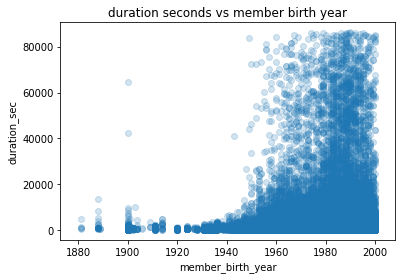

In [37]:
sns.regplot(data=bike_rental, x='member_birth_year', y='duration_sec', 
            fit_reg=False, scatter_kws={'alpha': 0.2});
plt.title('duration seconds vs member birth year');

It is hard to figure out the relationship between member birth year and duration seconds so that I'll plot a heatmap

heatmap

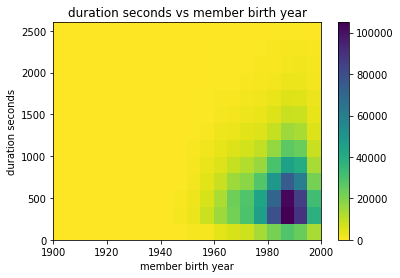

In [38]:
birth_bins_x = np.arange(1900, bike_rental_cut_duration_outliers.member_birth_year.max()+5, 5)
birth_bins_y = np.arange(0, bike_rental_cut_duration_outliers.duration_sec.max()+200, 200)
plt.hist2d(data=bike_rental_cut_duration_outliers, x='member_birth_year', y='duration_sec', bins=[birth_bins_x, birth_bins_y], 
           cmap = 'viridis_r')
plt.colorbar()
plt.title('duration seconds vs member birth year');
plt.xlabel('member birth year')
plt.ylabel('duration seconds');

There are extreme many members who ride bikes for about 500 seconds, and born in 1990s

#### heatmap(duration_sec against start_hour)

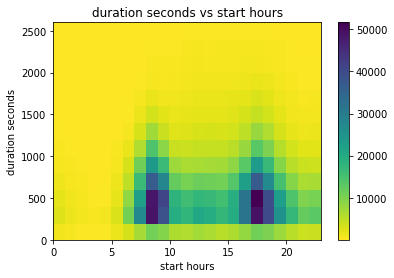

In [39]:
hour_bins_x = np.arange(0, bike_rental_cut_duration_outliers.start_hour.max()+1, 1)
hour_bins_y = np.arange(0, bike_rental_cut_duration_outliers.duration_sec.max()+200, 200)
plt.hist2d(data=bike_rental_cut_duration_outliers, x='start_hour', y='duration_sec', bins=[hour_bins_x, hour_bins_y],
          cmap='viridis_r')
plt.colorbar()
plt.title('duration seconds vs start hours');
plt.xlabel('start hours')
plt.ylabel('duration seconds');

There are extreme many members who ride bikes at 8:00 in the morning and 17:00 in the afternoon for about 300~500 seconds

#### heatmap (duration_sec against month)

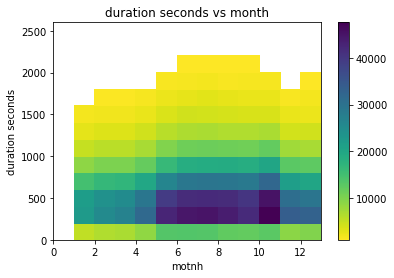

In [40]:
hour_bins_x = np.arange(0, bike_rental_cut_duration_outliers.month.max()+2, 1)
hour_bins_y = np.arange(0, bike_rental_cut_duration_outliers.duration_sec.max()+200, 200)
plt.hist2d(data=bike_rental_cut_duration_outliers, x='month', y='duration_sec', bins=[hour_bins_x, hour_bins_y],
          cmap='viridis_r', cmin=1000)
plt.colorbar()
plt.title('duration seconds vs month');
plt.xlabel('motnh')
plt.ylabel('duration seconds');

As expected, there are extreme many members who ride bikes from May to October

#### heatmap (member_gender against user_type)

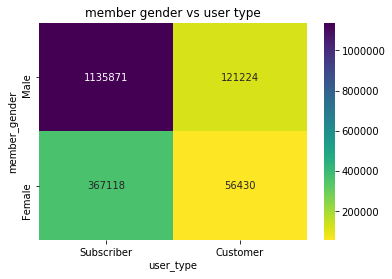

In [41]:
type_counts = bike_rental_cut_duration_outliers.groupby(['user_type', 'member_gender']).size()
type_counts = type_counts.reset_index(name='count')
type_counts = type_counts.pivot(index='member_gender', columns='user_type', values='count')
sns.heatmap(type_counts, annot = True, fmt = 'd', cmap='viridis_r')
plt.title('member gender vs user type');

Male subscriber are three times more than female subscriber

### Talk about some of the relationships you observed in this part of the investigation. How did the feature of interest vary with other features in the dataset?

There are numeric variables and categorical variables. Numberics are duration_sec, member_birth_year, month, start_hour and Categoricals are user_type, member_gender, bike_share_for_all_trip. Variable of interest is durations_sec beacuse it is highly related with rental fees.

member_birth_year: There are extreme many members who ride bikes for about 500 seconds, and born in 1990s  
month: There are extreme many members who ride bikes from May to October  
start hour: There are extreme many members who ride bikes at 8:00 in the morning and 17:00 in the afternoon for about 300~500 seconds  
user_type: It shows that Custmoers more likely to ride bikes longer than Subscribers  
member_gender: Duration seconds of Female slightly longer than Male  
biek_share_for_all_trip: Duration seconds of No slightly longer than Yes  


## Multivariate plots

#### duration_sec, start_hour, member_gender

Text(0.5, 1.0, '')

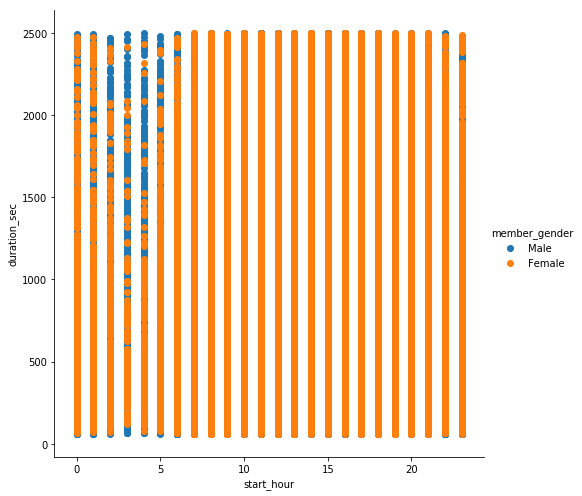

In [42]:
g = sns.FacetGrid(data=bike_rental_cut_duration_outliers, hue='member_gender', height=7)
g.map(plt.scatter, 'start_hour', 'duration_sec')
g.add_legend();
plt.title('')

It is hard to figure out so I'll use heatmap of each gender

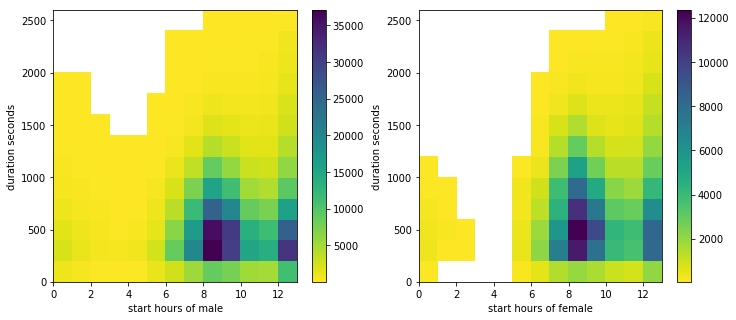

In [43]:
bike_rental_cut_duration_outliers_male = bike_rental_cut_duration_outliers.query('member_gender == "Male"')
bike_rental_cut_duration_outliers_female = bike_rental_cut_duration_outliers.query('member_gender == "Female"')

plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 1)
plt.hist2d(data=bike_rental_cut_duration_outliers_male, x='start_hour', y='duration_sec', bins=[hour_bins_x, hour_bins_y],
          cmap='viridis_r', cmin=50)
plt.colorbar()
plt.xlabel('start hours of male')
plt.ylabel('duration seconds');

plt.subplot(1, 2, 2)
plt.hist2d(data=bike_rental_cut_duration_outliers_female, x='start_hour', y='duration_sec', bins=[hour_bins_x, hour_bins_y],
          cmap='viridis_r', cmin=50)
plt.colorbar()
plt.xlabel('start hours of female')
plt.ylabel('duration seconds');

Bivariate plot shows that duration seconds of Female slightly longer than Male as you can see in previous graph. But this graph tells me another information that male ride bikes at dawn more than female

#### duration_sec, start_hour, user_type

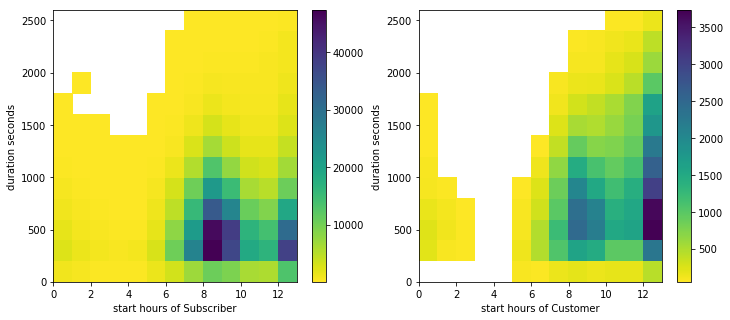

In [44]:
bike_rental_cut_duration_outliers_sub = bike_rental_cut_duration_outliers.query('user_type == "Subscriber"')
bike_rental_cut_duration_outliers_cus = bike_rental_cut_duration_outliers.query('user_type == "Customer"')

plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 1)
plt.hist2d(data=bike_rental_cut_duration_outliers_sub, x='start_hour', y='duration_sec', bins=[hour_bins_x, hour_bins_y],
          cmap='viridis_r', cmin=50)
plt.colorbar()
plt.xlabel('start hours of Subscriber')
plt.ylabel('duration seconds');

plt.subplot(1, 2, 2)
plt.hist2d(data=bike_rental_cut_duration_outliers_cus, x='start_hour', y='duration_sec', bins=[hour_bins_x, hour_bins_y],
          cmap='viridis_r', cmin=50)
plt.colorbar()
plt.xlabel('start hours of Customer')
plt.ylabel('duration seconds');

Subscriber ride bikes more regularly at around 8:00 and 17:00 than Customer. In Customer graph, this tendency disappears

#### duration_sec, month, member_gender

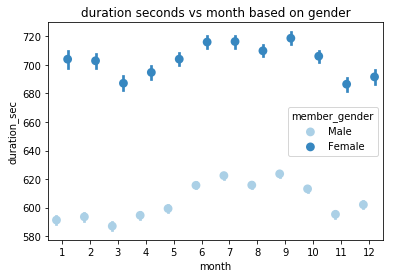

In [45]:
# poin plot of 2 numeric variables and 1 categorical variable
sns.pointplot(data=bike_rental_cut_duration_outliers, x='month', y='duration_sec', hue='member_gender',
              palette = 'Blues', linestyles='', dodge=0.4)
plt.title('duration seconds vs month based on gender');

It shows that Female more likely to ride bikes longer than Male especially on summer season

#### duration_sec, month, user_type

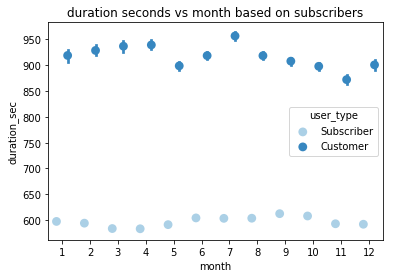

In [46]:
# poin plot of 2 numeric variables and 1 categorical variable
sns.pointplot(data=bike_rental_cut_duration_outliers, x='month', y='duration_sec', hue='user_type',
              palette = 'Blues', linestyles='', dodge=0.4)
plt.title('duration seconds vs month based on subscribers');

It shows that Custmoers more likely to ride bikes longer than Subscribers especially on summer season

### Talk about some of the relationships you observed in this part of the investigation. How did the feature of interest vary with other features in the dataset?

Main ideas are quite same as bivariated plots. Bivariate plot shows that duration seconds of Female slightly longer than Male as you can see in previous graph. But multivariate plots tells me another information that male ride bikes at dawn more than female  
Also, subscriber ride bikes more regularly at around 8:00 and 17:00 than customer. Finally, it shows that Female (Customer) more likely to ride bikes longer than Male (Subscriber) especially on summer season.